In [1]:
import pandas as pd
import numpy as np
import librosa
import random
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.io import wavfile
from pydub import AudioSegment

d:\Local_env\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
excel_file_path = "D:/4th Year/1st Term/IOT/Dr Sofy/Hearing Aid/echo-ha/clean_57.xlsx"

# Read the Excel file into a pandas DataFrame
df_clean = pd.read_excel(excel_file_path)

In [3]:
df_clean

,0
0,-1483
1,-1796
2,-1724
3,-1449
4,-1275
...,...
22045,8
22046,-6
22047,-7
22048,-11


In [4]:
df_clean = df_clean.values
df_clean = df_clean.flatten()
df_clean = df_clean.T

In [5]:
df_clean

array([-1483, -1796, -1724, ...,    -7,   -11,   -20], dtype=int64)

In [6]:
clean_57 = (df_clean).astype(np.int16)
print(clean_57)
write("C:/Users/Misara/OneDrive/Desktop/clean_57.wav", 11025, clean_57)

[-1483 -1796 -1724 ...    -7   -11   -20]


In [313]:
clean_57_df, sample_rate = librosa.load("C:/Users/Misara/OneDrive/Desktop/clean_57.wav", sr=11025)
# samplerate, clean_57_df = wavfile.read("C:/Users/Misara/OneDrive/Desktop/clean_57.wav", )

# # Create an AudioSegment instance
# wav_file = AudioSegment.from_file(file="C:/Users/Misara/OneDrive/Desktop/clean_57.wav",format="wav")
# print(wav_file)
# #clean_57_df = wav_file.set_frame_rate(11025)

In [315]:
df, sample_rate = librosa.load("D:/4th Year/1st Term/IOT/Desktop files/echo_57_44k.wav", sr=1000)
original = df

In [316]:
df

array([-0.04345331, -0.00772664,  0.1173127 , ..., -0.00024889,
        0.00257908,  0.00274454], dtype=float32)

In [317]:
w_old = []
for i in range(2000):
    w_old.append(random.uniform(0,0.02))

In [318]:
w_old = np.array(w_old)
w_old_T = w_old.T
w_old_T.shape

(2000,)

In [319]:
window_size = 2000
miu = 0.000001

for i in range(2000):
    #est = np.multiply(df,w_old_T)
    est = np.dot(df,w_old_T)
    df[i] = df[i] - est
    w_old_T = w_old_T + ((miu * (np.multiply(est,df[i]))))

In [320]:
df

array([-0.05374613, -0.01792335,  0.10729369, ..., -0.00024889,
        0.00257908,  0.00274454], dtype=float32)

In [321]:
processed = df
#from scipy.io.wavfile import write
#write("C:/Users/Misara/OneDrive/Desktop/processed_57.wav", 44100, processed)

In [322]:
processed

array([-0.05374613, -0.01792335,  0.10729369, ..., -0.00024889,
        0.00257908,  0.00274454], dtype=float32)

## Plotting

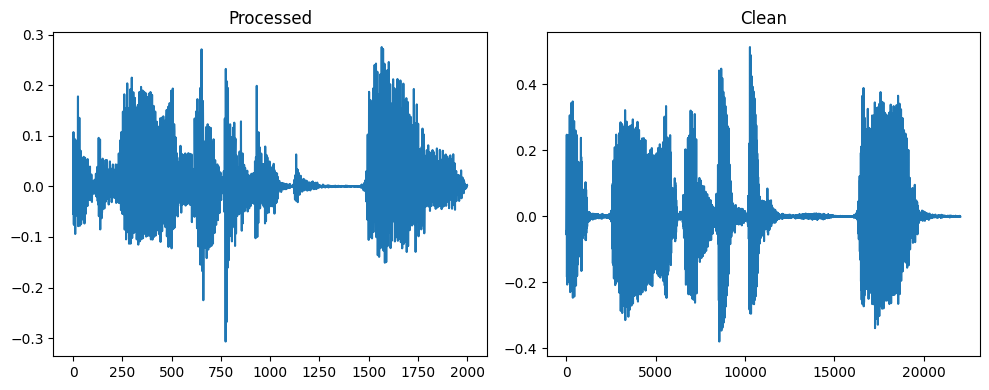

In [323]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first set of values in the first subplot
axs[0].plot(processed)
axs[0].set_title('Processed')

# Plot the second set of values in the second subplot
axs[1].plot(clean_57_df)
axs[1].set_title('Clean')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()